# PREVENDO DIABETES (LOGISTIC REGRESSION- PYTHON)

> *Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. Seu objetivo é prever se um paciente tem diabetes ou não, com base em certas medidas diagnósticas incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de herança indígena Pima.* <br>

<br>

**Dataset:** https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
# Carregar pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importar dados
df_diabetes= pd.read_csv("diabetes.csv")

In [3]:
# Informações gerais dos dados
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Visualizar as cinco primeiras linhas do dataset
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Visualizar as cinco últimas linhas do dataset
df_diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Estatística descritiva dos dados
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Checar NAs
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2. LIMPEZA, TRANSFORMAÇÃO E ANÁLISE EXPLORATÓRIA DOS DADOS

**2.1 Dicionário das Variáveis** <br>
<br>
**Pregnancies:** Número de vezes que engravidou <br>
**Glucose:** Concentração de glicose plasmática após duas horas do teste <br>
**BloodPressure:** Pressão arterial diastólica (mm Hg) <br>
**SkinThickness:** Espessura da dobra de pele do tríceps (mm)v
**Insulin:** Insulina sérica após 2 horas do teste <br>
**BMI:** Índice de massa corporal <br>
**DiabetesPedigreeFunction:** Função que mede tendência a partir do histórico familiar <br>
**Age:** Idade <br>
**Outcome:** variável dependente (0 e 1) <br>

### Variáveis

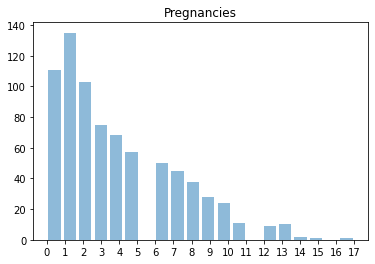

In [8]:
# Plotando variável Pregnancies
plt.hist(df_diabetes["Pregnancies"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Pregnancies")
plt.xlabel("")
plt.xticks(range(min(df_diabetes["Pregnancies"]), max(df_diabetes["Pregnancies"])+1))
plt.show()

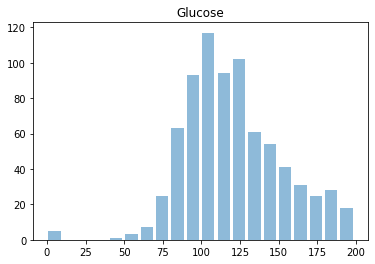

In [9]:
# Plotando variável Glucose
plt.hist(df_diabetes["Glucose"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Glucose")
plt.xlabel("")
plt.show()

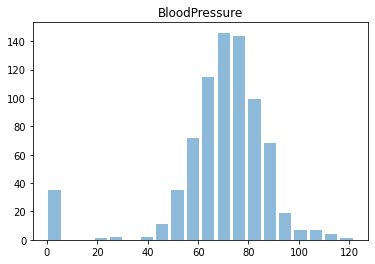

In [10]:
# Plotando variável BloodPressure
plt.hist(df_diabetes["BloodPressure"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("BloodPressure")
plt.xlabel("")
plt.show()

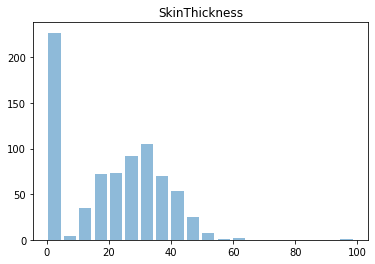

In [11]:
# Plotando variável SkinThickness
plt.hist(df_diabetes["SkinThickness"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("SkinThickness")
plt.xlabel("")
plt.show()

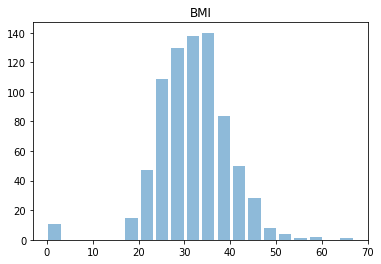

In [12]:
# Plotando variável BMI
plt.hist(df_diabetes["BMI"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("BMI")
plt.xlabel("")
plt.show()

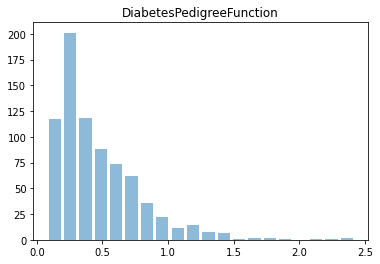

In [13]:
# Plotando variável DiabetesPedigreeFunction
plt.hist(df_diabetes["DiabetesPedigreeFunction"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("DiabetesPedigreeFunction")
plt.xlabel("")
plt.show()

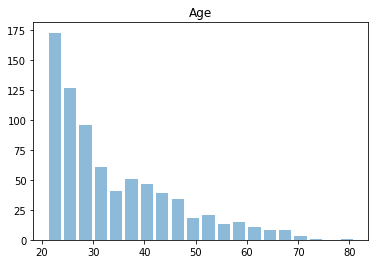

In [14]:
# Plotando variável Age
plt.hist(df_diabetes["Age"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Age")
plt.xlabel("")
plt.show()

G:\Anaconda3\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


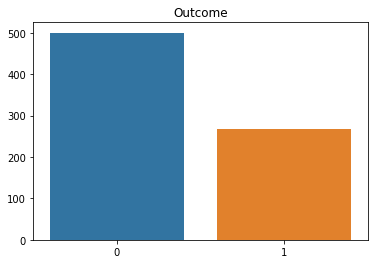

In [15]:
# Plotando variável Outcome
sns.countplot(df_diabetes["Outcome"])
plt.title("Outcome")
plt.ylabel("")
plt.xlabel("")
plt.show()

### 2.3 Limpando e Transformando Variáveis

Algumas variáveis possuem valores estranhos e devemos tomar uma decisão sobre como proceder.

* Pregnancies: uma observação possui o valor de 17. Embora seja incomum, é possível que uma mulher tenha 17 gravidezes. Optamos por não realizar nenhum procedimento. <br>
* As variáveis Glucose (5), Bloodpressure (35), SkinThickness (227), Insulin (374) e BMI (11) possuem observações com valor zero. Dado suas características devemos realizar alterações. Iremos substituir os valores zero pela sua média.

## 3. CONSTRUINDO MODELO

In [16]:
# Variáveis independentes
X = df_diabetes.drop("Outcome", axis = 1)

In [17]:
# Substituindo valores 0 em X pela média
X.replace(0,X.mean(axis=0),inplace=True)

In [18]:
# Variável dependente
y= df_diabetes["Outcome"]

In [19]:
# Visualizando as dimensões de X e y
print(X.shape,y.shape)

(768, 8) (768,)


In [20]:
# Divisão em dados de treino e teste
X_treino, X_teste, Y_treino, Y_teste= train_test_split(X,y, test_size=0.3,stratify=y)

In [21]:
# Normalizando os dados
minmax = MinMaxScaler()
X_treino_norm = minmax.fit_transform(X_treino) 
X_teste_norm = minmax.transform(X_teste)

### MODELOS

### Modelo 1

* Usando todas variáveis independentes
* Sem cross-validation

In [22]:
# Construindo modelo 1
model_v1= LogisticRegression().fit(X_treino_norm,Y_treino)

In [23]:
# Fazendo previsões
glm_pred_v1= model_v1.predict(X_teste_norm)

In [24]:
# Matrix de confusão
cm_v1 = confusion_matrix(Y_teste, glm_pred_v1) 
print ("Matriz de Confusão: \n", cm_v1)

Matriz de Confusão: 
 [[129  21]
 [ 38  43]]


In [25]:
# Acurácia do modelo 1
print ("Acurácia do modelo 1: ", accuracy_score(Y_teste, glm_pred_v1))

Acurácia do modelo 1:  0.7445887445887446


In [26]:
# Relatório da classificação
print(classification_report(Y_teste, glm_pred_v1))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



In [27]:
# Obter variáveis mais importantes
var_importantes=pd.DataFrame({"X":list(X.columns),"var_importantes":[abs(i) for i in model_v1.coef_[0]]})
var_importantes.sort_values("var_importantes",ascending=False)

,X,var_importantes
1,Glucose,3.988158
5,BMI,2.304687
6,DiabetesPedigreeFunction,1.341182
0,Pregnancies,1.267302
7,Age,1.247435
3,SkinThickness,1.082881
4,Insulin,0.376851
2,BloodPressure,0.046430


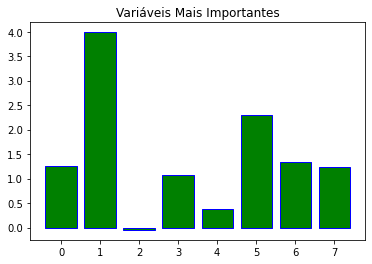

In [28]:
# Plotando variáveis mais importantes
importancia = model_v1.coef_[0]
plt.bar(range(len(importancia)), importancia,color="green",ec="blue")
plt.title("Variáveis Mais Importantes")
plt.show()

In [29]:
# ROC AUC modelo 1
ROC_AUC = roc_auc_score(Y_teste, glm_pred_v1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6954


### Modelo 2

* Usando todas variáveis indepententes
* Usando cross-validation

In [30]:
# Construindo modelo 2
model_v2= LogisticRegressionCV(cv=21).fit(X_treino_norm,Y_treino)

In [31]:
# Fazendo previsões
glm_pred_v2= model_v2.predict(X_teste_norm)

In [32]:
# Matrix de confusão
cm2 = confusion_matrix(Y_teste,glm_pred_v2)
print ("Matriz de Confusão: \n", cm2)

Matriz de Confusão: 
 [[126  24]
 [ 32  49]]


In [33]:
# Acurácia do modelo 2
print ("Acurácia do modelo 2: ", accuracy_score(Y_teste, glm_pred_v2))

Acurácia do modelo 2:  0.7575757575757576


In [34]:
# Relatório da classificação
print(classification_report(Y_teste, glm_pred_v2))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       150
           1       0.67      0.60      0.64        81

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [35]:
# Obter variáveis mais importantes
var_importantes_CV=pd.DataFrame({"X":list(X.columns),"var_importantes_CV":[abs(i) for i in model_v1.coef_[0]]})
var_importantes_CV.sort_values("var_importantes_CV",ascending=False)

,X,var_importantes_CV
1,Glucose,3.988158
5,BMI,2.304687
6,DiabetesPedigreeFunction,1.341182
0,Pregnancies,1.267302
7,Age,1.247435
3,SkinThickness,1.082881
4,Insulin,0.376851
2,BloodPressure,0.046430


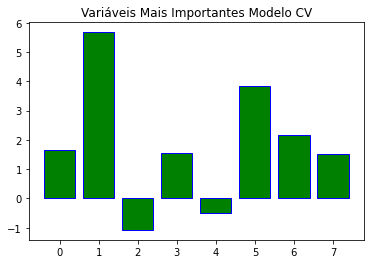

In [36]:
# Plotando variáveis mais importantes
importancia2 = model_v2.coef_[0]
plt.bar(range(len(importancia2)), importancia2,color="green",ec="blue")
plt.title("Variáveis Mais Importantes Modelo CV")
plt.show()

In [37]:
# ROC AUC modelo 2
ROC_AUC = roc_auc_score(Y_teste, glm_pred_v2)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7225


### Modelo 3

* Modelo com as variáveis mais importantes (Glucose, BMI, Pregnancies, DiabetesPedigreeFunction)
* Cross-validation

In [38]:
# Selecionando variáveis importantes
X_treino_imp=X_treino.drop(["BloodPressure","SkinThickness","Insulin","Age"],axis=1)
X_teste_imp=X_teste.drop(["BloodPressure","SkinThickness","Insulin","Age"],axis=1)

In [39]:
# Normalizando as variáveis
X_treino_imp_norm = minmax.fit_transform(X_treino_imp) 
X_teste_imp_norm = minmax.transform(X_teste_imp)

In [40]:
# Construindo modelo 3
model_v3= LogisticRegressionCV(cv=21).fit(X_treino_imp_norm,Y_treino)

In [41]:
# Fazendo previsões
glm_pred_v3= model_v3.predict(X_teste_imp_norm)

In [42]:
# Matrix de confusão
cm3 = confusion_matrix(Y_teste,glm_pred_v3)
print ("Matriz de Confusão: \n", cm3)

Matriz de Confusão: 
 [[132  18]
 [ 32  49]]


In [43]:
# Acurácia do modelo 3
print ("Acurácia do modelo 3: ", accuracy_score(Y_teste, glm_pred_v3))

Acurácia do modelo 3:  0.7835497835497836


In [44]:
# Relatório da classificação
print(classification_report(Y_teste, glm_pred_v3))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.73      0.60      0.66        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [45]:
# ROC AUC modelo 3
ROC_AUC = roc_auc_score(Y_teste, glm_pred_v3)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7425


DIEGO RAMIREZ <br>
daarfarias@hotmail.com <br>
https://github.com/daarfarias